In [1]:
%pylab inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import Quandl
import statsmodels.api as sm
import statsmodels.formula.api as smf
from statsmodels.graphics.api import abline_plot
import patsy
import seaborn as sns
sns.set(context='notebook', style='whitegrid', palette='deep', font='sans-serif', font_scale=1, rc=None)
import urllib2 as url
import statsmodels.api as sm
import statsmodels.formula.api as smf

Populating the interactive namespace from numpy and matplotlib


In [14]:
datas = pd.read_csv('data35to65.csv')

In [15]:
datas.head()

,Unique Id,indicator_id,geo_type_id,measurement_type_id,internal_id,subtopic_id,name,Measure,geo_type_name,description,...,year_description,data_value_heart,geo_entity_id.1,geo_entity_name.1,year_description.1,data_value_PM,geo_entity_id.2,geo_entity_name.2,year_description.2,data_value_NO
0,127504,172,3,125,90,13,Heart Attack Hospitalizations,Age-Adjusted Rate - Adults 35 to 64 Yrs Old,UHF42,Neighborhood (UHF 42),...,2010,11.5,101,Kingsbridge - Riverdale,Annual Average 2010,10.09,101,Kingsbridge - Riverdale,Annual Average 2010,20.13
1,127506,172,3,125,90,13,Heart Attack Hospitalizations,Age-Adjusted Rate - Adults 35 to 64 Yrs Old,UHF42,Neighborhood (UHF 42),...,2010,11.6,102,Northeast Bronx,Annual Average 2010,9.65,102,Northeast Bronx,Annual Average 2010,20.21
2,127508,172,3,125,90,13,Heart Attack Hospitalizations,Age-Adjusted Rate - Adults 35 to 64 Yrs Old,UHF42,Neighborhood (UHF 42),...,2010,16.6,103,Fordham - Bronx Pk,Annual Average 2010,10.26,103,Fordham - Bronx Pk,Annual Average 2010,22.06
3,127510,172,3,125,90,13,Heart Attack Hospitalizations,Age-Adjusted Rate - Adults 35 to 64 Yrs Old,UHF42,Neighborhood (UHF 42),...,2010,16.7,104,Pelham - Throgs Neck,Annual Average 2010,9.68,104,Pelham - Throgs Neck,Annual Average 2010,21.04
4,127512,172,3,125,90,13,Heart Attack Hospitalizations,Age-Adjusted Rate - Adults 35 to 64 Yrs Old,UHF42,Neighborhood (UHF 42),...,2010,17.9,105,Crotona -Tremont,Annual Average 2010,10.99,105,Crotona -Tremont,Annual Average 2010,25.25


(-5, 30)

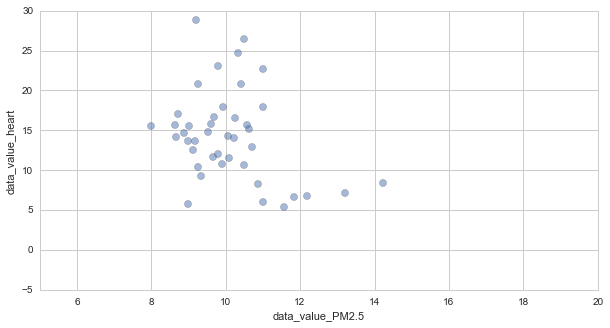

In [11]:
datas[['data_value_PM2.5', 'data_value_heart']].plot(kind='scatter', x='data_value_PM2.5', y='data_value_heart',marker='o', s=50, 
                                    alpha=0.5,figsize=(10,5))
plt.xlim(5, 20)
plt.ylim(-5, 30)

In [17]:
mod = smf.ols(formula='data_value_heart ~ data_value_PM + data_value_NO', data = datas).fit()
print(mod.summary())

                            OLS Regression Results                            
Dep. Variable:       data_value_heart   R-squared:                       0.115
Model:                            OLS   Adj. R-squared:                  0.070
Method:                 Least Squares   F-statistic:                     2.544
Date:                Thu, 10 Mar 2016   Prob (F-statistic):             0.0915
Time:                        15:14:57   Log-Likelihood:                -129.20
No. Observations:                  42   AIC:                             264.4
Df Residuals:                      39   BIC:                             269.6
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [95.0% Conf. Int.]
---------------------------------------------------------------------------------
Intercept        24.2950     11.424      2.127

In [23]:
datas['heart'] = np.log(datas['data_value_heart'])
datas['PM'] = np.log(datas['data_value_PM'])
datas['NO'] = np.log(datas['data_value_NO'])

In [24]:
mod = smf.ols(formula='heart ~ PM + NO', data = datas).fit()
print(mod.summary())

                            OLS Regression Results                            
Dep. Variable:                  heart   R-squared:                       0.159
Model:                            OLS   Adj. R-squared:                  0.116
Method:                 Least Squares   F-statistic:                     3.699
Date:                Thu, 10 Mar 2016   Prob (F-statistic):             0.0338
Time:                        15:18:32   Log-Likelihood:                -18.971
No. Observations:                  42   AIC:                             43.94
Df Residuals:                      39   BIC:                             49.15
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
Intercept      5.6559      1.419      3.987      0.0

(-5, 30)

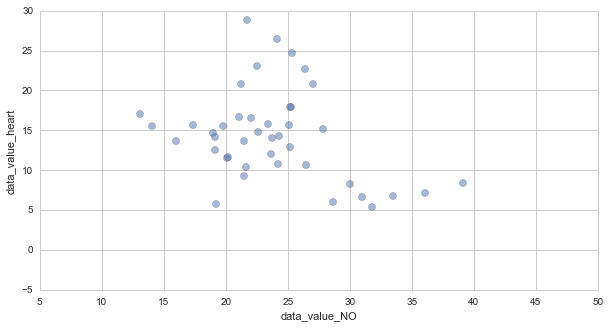

In [27]:
datas[['data_value_NO', 'data_value_heart']].plot(kind='scatter', x='data_value_NO', y='data_value_heart',marker='o', s=50, 
                                    alpha=0.5,figsize=(10,5))
plt.xlim(5, 50)
plt.ylim(-5, 30)

In [36]:
df = datas.sort_values('data_value_NO', ascending=1)
dfs = df.sort_values('data_value_PM', ascending=1)

In [33]:
Y = sm.add_constant(df['data_value_NO'])
model3 = smf.ols('data_value_heart ~ data_value_NO', data=df, missing='drop').fit()
print model3.summary()

                            OLS Regression Results                            
Dep. Variable:       data_value_heart   R-squared:                       0.115
Model:                            OLS   Adj. R-squared:                  0.093
Method:                 Least Squares   F-statistic:                     5.196
Date:                Thu, 10 Mar 2016   Prob (F-statistic):             0.0281
Time:                        15:30:05   Log-Likelihood:                -129.21
No. Observations:                  42   AIC:                             262.4
Df Residuals:                      40   BIC:                             265.9
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [95.0% Conf. Int.]
---------------------------------------------------------------------------------
Intercept        22.7976      3.800      6.000

In [37]:
mod = smf.ols(formula='data_value_heart ~ data_value_PM', data = dfs).fit()
print(mod.summary())

                            OLS Regression Results                            
Dep. Variable:       data_value_heart   R-squared:                       0.108
Model:                            OLS   Adj. R-squared:                  0.085
Method:                 Least Squares   F-statistic:                     4.831
Date:                Thu, 10 Mar 2016   Prob (F-statistic):             0.0338
Time:                        15:51:12   Log-Likelihood:                -129.38
No. Observations:                  42   AIC:                             262.8
Df Residuals:                      40   BIC:                             266.2
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [95.0% Conf. Int.]
---------------------------------------------------------------------------------
Intercept        29.5268      6.957      4.244

In [38]:
datas = pd.read_csv('Dataheart.csv')

In [39]:
mod = smf.ols(formula='data_value_heart ~ data_value_PM + data_value_NO', data = datas).fit()
print(mod.summary())

                            OLS Regression Results                            
Dep. Variable:       data_value_heart   R-squared:                       0.093
Model:                            OLS   Adj. R-squared:                  0.083
Method:                 Least Squares   F-statistic:                     8.509
Date:                Thu, 10 Mar 2016   Prob (F-statistic):           0.000304
Time:                        16:05:50   Log-Likelihood:                -517.05
No. Observations:                 168   AIC:                             1040.
Df Residuals:                     165   BIC:                             1049.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [95.0% Conf. Int.]
---------------------------------------------------------------------------------
Intercept        19.0981      4.623      4.131

In [42]:
mod = smf.ols(formula='data_value_heart ~ data_value_NO', data = datas).fit()
print(mod.summary())

                            OLS Regression Results                            
Dep. Variable:       data_value_heart   R-squared:                       0.092
Model:                            OLS   Adj. R-squared:                  0.086
Method:                 Least Squares   F-statistic:                     16.79
Date:                Thu, 10 Mar 2016   Prob (F-statistic):           6.53e-05
Time:                        16:40:53   Log-Likelihood:                -517.21
No. Observations:                 168   AIC:                             1038.
Df Residuals:                     166   BIC:                             1045.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [95.0% Conf. Int.]
---------------------------------------------------------------------------------
Intercept        21.4374      1.792     11.963

In [43]:
mod = smf.ols(formula='data_value_heart ~ data_value_PM', data = datas).fit()
print(mod.summary())

                            OLS Regression Results                            
Dep. Variable:       data_value_heart   R-squared:                       0.072
Model:                            OLS   Adj. R-squared:                  0.066
Method:                 Least Squares   F-statistic:                     12.79
Date:                Thu, 10 Mar 2016   Prob (F-statistic):           0.000456
Time:                        16:41:12   Log-Likelihood:                -519.06
No. Observations:                 168   AIC:                             1042.
Df Residuals:                     166   BIC:                             1048.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [95.0% Conf. Int.]
---------------------------------------------------------------------------------
Intercept        25.7563      3.233      7.968

In [44]:
mod = smf.ols(formula='heart ~ PM', data = datas).fit()
print(mod.summary())

                            OLS Regression Results                            
Dep. Variable:                  heart   R-squared:                       0.121
Model:                            OLS   Adj. R-squared:                  0.115
Method:                 Least Squares   F-statistic:                     22.79
Date:                Thu, 10 Mar 2016   Prob (F-statistic):           3.94e-06
Time:                        16:41:33   Log-Likelihood:                -80.254
No. Observations:                 168   AIC:                             164.5
Df Residuals:                     166   BIC:                             170.8
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
Intercept      5.2619      0.563      9.349      0.0

In [45]:
mod = smf.ols(formula='heart ~ NO', data = datas).fit()
print(mod.summary())

                            OLS Regression Results                            
Dep. Variable:                  heart   R-squared:                       0.124
Model:                            OLS   Adj. R-squared:                  0.119
Method:                 Least Squares   F-statistic:                     23.51
Date:                Thu, 10 Mar 2016   Prob (F-statistic):           2.84e-06
Time:                        16:41:51   Log-Likelihood:                -79.934
No. Observations:                 168   AIC:                             163.9
Df Residuals:                     166   BIC:                             170.1
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
Intercept      4.5771      0.413     11.077      0.0

In [40]:
datas['heart'] = np.log(datas['data_value_heart'])
datas['PM'] = np.log(datas['data_value_PM'])
datas['NO'] = np.log(datas['data_value_NO'])

In [41]:
mod = smf.ols(formula='heart ~ PM + NO', data = datas).fit()
print(mod.summary())

                            OLS Regression Results                            
Dep. Variable:                  heart   R-squared:                       0.128
Model:                            OLS   Adj. R-squared:                  0.118
Method:                 Least Squares   F-statistic:                     12.15
Date:                Thu, 10 Mar 2016   Prob (F-statistic):           1.19e-05
Time:                        16:06:20   Log-Likelihood:                -79.517
No. Observations:                 168   AIC:                             165.0
Df Residuals:                     165   BIC:                             174.4
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
Intercept      4.9813      0.608      8.188      0.0